# <font color = 'green'> <header> <center> **Food Delivery Cost and Profitability** </center> </header> </font>

## **Process we can follow for the task of Food Delivery Cost and Profitability Analysis:**

 **1) Start by gathering comprehensive data related to all aspects of food delivery operations.**
 
 **2) Clean the dataset for inconsistencies, missing values, or irrelevant information.**
 
 **3) Extract relevant features that could impact cost and profitability.**
 
 **4) Break down the costs associated with each order, including fixed costs (like packaging) and variable costs (like delivery fees and discounts).**
 
 **5) Determine the revenue generated from each order, focusing on commission fees and the order value before discounts.**
 
 **6) For each order, calculate the profit by subtracting the total costs from the revenue. Analyze the distribution of profitability across all orders to identify trends.**
 
 **7) Based on the cost and profitability analysis, develop strategic recommendations aimed at enhancing profitability.**
 
 **8) Use the data to simulate the financial impact of proposed changes, such as adjusting discount or commission rates**

# **Introduction**

Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.

Food Delivery Cost and Profitability Analysis is a comprehensive evaluation aimed at understanding and optimizing the financial dynamics of a food delivery operation. The goal is to identify areas where the service can reduce costs, increase revenue, and implement pricing or commission strategies that enhance profitability

# **Load the Packages and Data**

### **Import Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### **Loading Dataset**

In [2]:
food_orders = pd.read_csv("D:/JAI_ANALYTICS_NEW/Project_new/Food_Delivery/Food_Orders.csv")

In [3]:
food_orders.head()

Order ID Customer ID Restaurant ID Order Date and Time  \
0         1       C8270         R2924    01-02-2024 01:11   
1         2       C1860         R2054    02-02-2024 22:11   
2         3       C6390         R2870    31-01-2024 05:54   
3         4       C6191         R2642    16-01-2024 22:52   
4         5       C6734         R2799    29-01-2024 01:19   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0       01-02-2024 02:39         1914             0       Credit Card   
1       02-02-2024 22:46          986            40    Digital Wallet   
2       31-01-2024 06:52          937            30  Cash on Delivery   
3       16-01-2024 23:38         1463            50  Cash on Delivery   
4       29-01-2024 02:48         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                      23   
2         15% New User             195                      45   
3                  NaN             146                      27   
4         50 off Promo             130                      50   

   Refunds/Chargebacks  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

# **Data Profiling**

### **Understanding data**

In [4]:
food_orders.shape                     #Will give the numbers of Rows and columns of Dataframe

(1000, 12)

Food_orders data has **1000 Rows and 12 Columns**

In [5]:
food_orders.columns                 # Will give all columns names that are present in dataset

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

In [6]:
# To find information about data i.e. Data Type, Count, Null values
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


As We can see here only Discount Column has null value i.e. **185**

In [7]:
# To find Statistacal Deatils of dataset about Numerical data/Columns
food_orders.describe()

Order ID  Order Value  Delivery Fee  Commission Fee  \
count  1000.000000  1000.000000   1000.000000      1000.00000   
mean    500.500000  1053.969000     28.620000       126.99000   
std     288.819436   530.975339     16.958278        43.06405   
min       1.000000   104.000000      0.000000        50.00000   
25%     250.750000   597.750000     20.000000        90.00000   
50%     500.500000  1038.500000     30.000000       127.00000   
75%     750.250000  1494.000000     40.000000       164.00000   
max    1000.000000  1995.000000     50.000000       200.00000   

       Payment Processing Fee  Refunds/Chargebacks  
count             1000.000000          1000.000000  
mean                29.832000            28.300000  
std                 11.627165            49.614228  
min                 10.000000             0.000000  
25%                 20.000000             0.000000  
50%                 30.000000             0.000000  
75%                 40.000000            50.000000  
max                 50.000000           150.000000

In [8]:
# To find Statistacal Deatils of dataset about Numerical as well as Non-Numerical Columns
food_orders.describe(include='all')

Order ID Customer ID Restaurant ID Order Date and Time  \
count   1000.000000        1000          1000                1000   
unique          NaN         947           621                 994   
top             NaN       C7938         R2317    04-02-2024 18:17   
freq            NaN           3             6                   2   
mean     500.500000         NaN           NaN                 NaN   
std      288.819436         NaN           NaN                 NaN   
min        1.000000         NaN           NaN                 NaN   
25%      250.750000         NaN           NaN                 NaN   
50%      500.500000         NaN           NaN                 NaN   
75%      750.250000         NaN           NaN                 NaN   
max     1000.000000         NaN           NaN                 NaN   

       Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
count                    1000  1000.000000   1000.000000              1000   
unique                    992          NaN           NaN                 3   
top          22-01-2024 03:09          NaN           NaN  Cash on Delivery   
freq                        2          NaN           NaN               357   
mean                      NaN  1053.969000     28.620000               NaN   
std                       NaN   530.975339     16.958278               NaN   
min                       NaN   104.000000      0.000000               NaN   
25%                       NaN   597.750000     20.000000               NaN   
50%                       NaN  1038.500000     30.000000               NaN   
75%                       NaN  1494.000000     40.000000               NaN   
max                       NaN  1995.000000     50.000000               NaN   

       Discounts and Offers  Commission Fee  Payment Processing Fee  \
count                   815      1000.00000             1000.000000   
unique                    4             NaN                     NaN   
top                     10%             NaN                     NaN   
freq                    233             NaN                     NaN   
mean                    NaN       126.99000               29.832000   
std                     NaN        43.06405               11.627165   
min                     NaN        50.00000               10.000000   
25%                     NaN        90.00000               20.000000   
50%                     NaN       127.00000               30.000000   
75%                     NaN       164.00000               40.000000   
max                     NaN       200.00000               50.000000   

        Refunds/Chargebacks  
count           1000.000000  
unique                  NaN  
top                     NaN  
freq                    NaN  
mean              28.300000  
std               49.614228  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%               50.000000  
max              150.000000

In [9]:
# Top 5 Records or Specific Number of Records that May be of 5,10,50 etc.
food_orders.head()

Order ID Customer ID Restaurant ID Order Date and Time  \
0         1       C8270         R2924    01-02-2024 01:11   
1         2       C1860         R2054    02-02-2024 22:11   
2         3       C6390         R2870    31-01-2024 05:54   
3         4       C6191         R2642    16-01-2024 22:52   
4         5       C6734         R2799    29-01-2024 01:19   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0       01-02-2024 02:39         1914             0       Credit Card   
1       02-02-2024 22:46          986            40    Digital Wallet   
2       31-01-2024 06:52          937            30  Cash on Delivery   
3       16-01-2024 23:38         1463            50  Cash on Delivery   
4       29-01-2024 02:48         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                      23   
2         15% New User             195                      45   
3                  NaN             146                      27   
4         50 off Promo             130                      50   

   Refunds/Chargebacks  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [10]:
food_orders.head(10)

Order ID Customer ID Restaurant ID Order Date and Time  \
0         1       C8270         R2924    01-02-2024 01:11   
1         2       C1860         R2054    02-02-2024 22:11   
2         3       C6390         R2870    31-01-2024 05:54   
3         4       C6191         R2642    16-01-2024 22:52   
4         5       C6734         R2799    29-01-2024 01:19   
5         6       C7265         R2777    25-01-2024 04:36   
6         7       C1466         R2457    12-01-2024 23:55   
7         8       C5426         R2978    26-01-2024 22:46   
8         9       C6578         R2877    02-01-2024 18:29   
9        10       C9322         R2161    05-01-2024 00:50   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0       01-02-2024 02:39         1914             0       Credit Card   
1       02-02-2024 22:46          986            40    Digital Wallet   
2       31-01-2024 06:52          937            30  Cash on Delivery   
3       16-01-2024 23:38         1463            50  Cash on Delivery   
4       29-01-2024 02:48         1992            30  Cash on Delivery   
5       25-01-2024 05:27          439            20  Cash on Delivery   
6       13-01-2024 00:48          303            30    Digital Wallet   
7       27-01-2024 00:36          260             0       Credit Card   
8       02-01-2024 20:23         1663            40  Cash on Delivery   
9       05-01-2024 02:10          491            40    Digital Wallet   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                      23   
2         15% New User             195                      45   
3                  NaN             146                      27   
4         50 off Promo             130                      50   
5                  10%              92                      27   
6            5% on App             144                      12   
7                  10%              55                      19   
8            5% on App             116                      48   
9                  10%             189                      10   

   Refunds/Chargebacks  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
5                  150  
6                   50  
7                    0  
8                    0  
9                    0

In [11]:
# Bottom 5 or last any number of specific records that we want to show we can see as
food_orders.tail()

Order ID Customer ID Restaurant ID Order Date and Time  \
995       996       C6232         R2129    14-01-2024 05:57   
996       997       C6797         R2742    28-01-2024 08:50   
997       998       C5926         R2837    21-01-2024 09:43   
998       999       C7016         R2144    30-01-2024 22:23   
999      1000       C4335         R2890    08-01-2024 14:46   

    Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
995       14-01-2024 06:39          825             0    Digital Wallet   
996       28-01-2024 10:10         1627            50  Cash on Delivery   
997       21-01-2024 10:44          553            20  Cash on Delivery   
998       31-01-2024 00:07         1414             0  Cash on Delivery   
999       08-01-2024 15:39         1657            20    Digital Wallet   

    Discounts and Offers  Commission Fee  Payment Processing Fee  \
995            5% on App             165                      47   
996                  NaN             110                      42   
997                  NaN              64                      31   
998         15% New User             199                      34   
999         15% New User             180                      27   

     Refunds/Chargebacks  
995                   50  
996                    0  
997                    0  
998                    0  
999                  100

In [12]:
# To find Number of null values 
food_orders.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

As We can see here only Discount Column has null value i.e. **185**.

# **Preprofiling**

### By pandas profiling, an interactive **HTML report** gets generated which contains all the information about the columns of the dataset, like the counts and type of each column. 

1. Detailed information about each column, coorelation between different columns and a sample of dataset.

2. It gives us visual interpretation of each column in the data.

3. Spread of the data can be better understood by the distribution plot.

4. Grannular level analysis of each column.

In [13]:
from ydata_profiling import ProfileReport

In [14]:
pre_profile = ProfileReport(food_orders, title = 'Profile Report')
pre_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
pre_profile.to_file(output_file = 'Food_Delivery_Before_Preprocessing.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Now performing **pandas profiling** to understand data better.

## **Preprocessing**

- Dealing with duplicate rows<br/>
    - Find number of duplicate rows in the dataset.
    - Print the duplicate entries and analyze.
    - Drop the duplicate entries from the dataset.

In [16]:
food_orders['Discounts and Offers'] = food_orders['Discounts and Offers'].fillna('0%')
food_orders['Discounts and Offers']

0         5% on App
1               10%
2      15% New User
3                0%
4      50 off Promo
           ...     
995       5% on App
996              0%
997              0%
998    15% New User
999    15% New User
Name: Discounts and Offers, Length: 1000, dtype: object

In [17]:
food_orders.isnull().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

 1) Convert **“Order Date and Time”** and **“Delivery Date and Time”** to a datetime format.
 3) Convert **“Discounts and Offers”** to a consistent numeric value (if applicable) or calculate the discount amounts.
 4) Ensure all monetary values are in a suitable format for calculations

In [36]:
 from datetime import datetime
 # convert date and time columns to datetime
 food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
 food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])
 # first, let's create a function to extract numeric values from the 'Discounts and Offers' string
 def extract_discount(discount_str):
     if 'off' in discount_str:
         return float(discount_str.split(' ')[0])   # Fixed amount off
     elif '%' in discount_str:
         return float(discount_str.split('%')[0])   # Percentage off
     else:
         return 0.0                                 # No discount

 # apply the function to create a new 'Discount Value' column
 food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount())
 # for percentage discounts, calculate the discount amount based on the order value
 food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] 
                                    if x['Discount Percentage'] > 1
                                     else x['Discount Percentage'], axis = 1)
 # adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
 food_orders['Discount Amount'] = food_orders.apply(lambda x: x['Discount Amount'] if x['Discount Percentage']
                                     else x['Order Value'] * x['Discount Percentage'] / 100, axis = 1)
 print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1097316534.py, line 17)

In [37]:
post_profile = ProfileReport(food_orders, title = 'Profile Report')
post_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
post_profile.to_file(output_file='CarSales_After_preprocessing.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**The data are processed now. The dataset doesnot contain missing and zero values. The pandas profiling report generated after processing the data giving us more clear data. We can compare the two reports.**

## **The data is now ready with the following adjustments:**

 **Order Date and Time and Delivery Date and Time columns have been converted to datetime format.**
 
 **A new column, Discount Amount, has been calculated based on the Discounts and Offers column. This was achieved by extracting percentage discounts or fixed amounts and applying them to the order value.**
 
**Discount Percentage has been added to represent the discount rate or fixed amount discount directly.** 

## **Cost and Profitability Analysis**

**For the cost analysis, we’ll consider the following costs associated with each order:**

**Delivery Fee: The fee charged for delivering the order**

**Payment Processing Fee: The fee for processing the payment.** fees

**Discount Amount: The discount provided on the order.**

**We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.**

**The revenue for the platform is mainly derived from the Commission Fee. We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.**

In [41]:
# Calculate total cost and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Refunds/Chargebacks']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()
overall_metrics = {
                 "Total Orders": total_orders,
                 "Total Revenue": total_revenue,
                 "Total Costs": total_costs,
                 "Total Profit": total_profit
 }
print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 86752, 'Total Profit': 40238}


### **Based on the analysis, here are the overall metrics for the food delivery operations:**

**Total Orders: 1,000 Total Revenue (from Commission Fees): 126,990 INR Total Costs: 86752 INR (including delivery fees,
 payment processing fees, and discounts) Total Profit: 40238 INR**
 
The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability

**To better understand the distribution of costs, revenue, and profit, let’s plot:**

A histogram of profits per order to visualize the distribution of profitable and unprofitable orders. A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts). A bar chart to compare total revenue, total costs, and total profit
 Let’s plot the histogram first

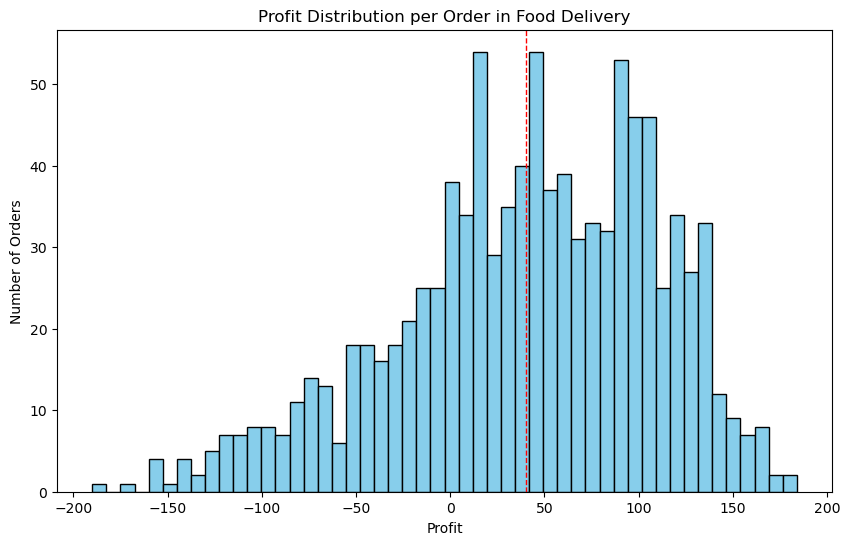

In [43]:
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

**The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits below 0). The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation**

### **Now, let’s have a look at the proportion of total costs:**

In [47]:
# pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'skyblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

KeyError: "['Discount Amount'] not in index"

The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

### **Now, let’s compare total revenue, total costs, and total profit (net loss in our case)**

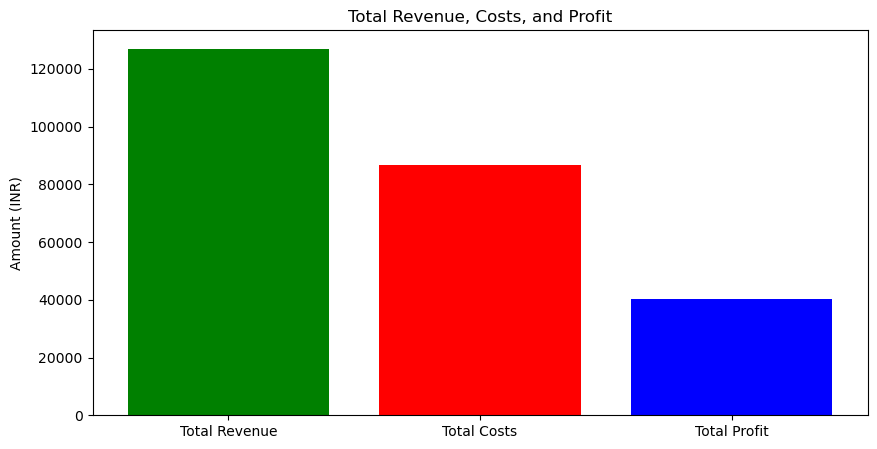

In [52]:
 # bar chart for total revenue, costs, and profit
 totals = ['Total Revenue', 'Total Costs', 'Total Profit']
 values = [total_revenue, total_costs, total_profit]
 plt.figure(figsize=(10, 5))
 plt.bar(totals, values, color=['green', 'red', 'blue'])
 plt.title('Total Revenue, Costs, and Profit')
 plt.ylabel('Amount (INR)')
 plt.show()

The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

**A New Strategy for Profits**
 
From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply.

**Specifically, we need to look for:**

A new average commission percentage based on profitable orders.

A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.

**Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability. Let’s calculate:**

 The average commission percentage for profitable orders.
 
 The average discount percentage for profitable orders

In [53]:
# Filter the dataset for profitable orders
profitable_orders = food_orders[food_orders['Profit'] > 0].copy()

# Calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# Calculate the effective discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# Calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

# Display the results
print("Average Commission Percentage (Profitable Orders):", round(new_avg_commission_percentage, 2), "%")
print("Average Discount Percentage (Profitable Orders):", round(new_avg_discount_percentage, 2), "%")


KeyError: 'Discount Amount'

**Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages:**

**New Average Commission Percentage: 30.51%**

**New Average Discount Percentage: 5.87%**

The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly deterring order volume.

Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 6% could potentially improve profitability across the board.

Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. 
For this, we need to:
 
**Calculate the profitability per order using the actual discounts and commissions already present in the dataset.**

Simulate profitability per order using the recommended discounts (6%) and commissions (30%) to see the potential impact on profitability. This comparison will help illustrate the potential impact of adopting the recommended discount and commission rates on the overall profitability of orders. 

**Here’s how to visualize this comparison**

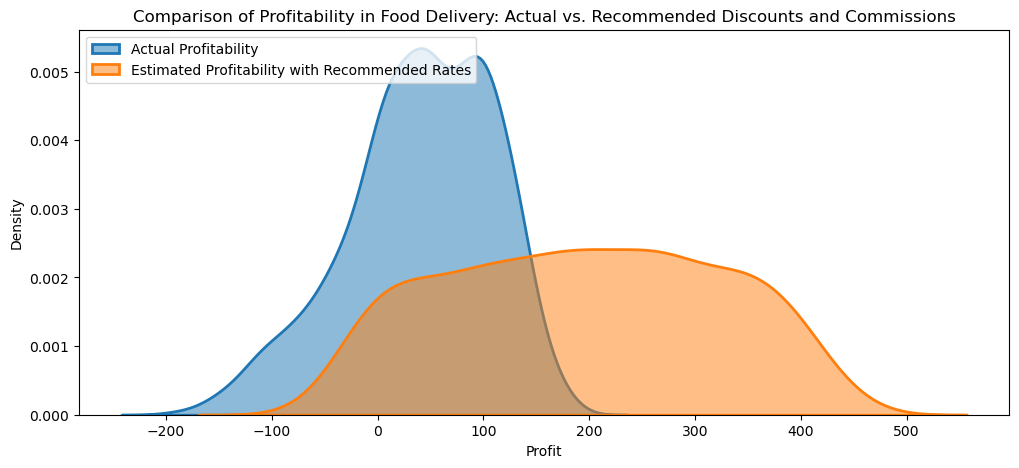

In [57]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0     # 6%
# calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage /100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage /100)
# recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Simulated Discount Amount'])
food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] - food_orders['Simulated Total Costs'])
plt.figure(figsize=(12, 5))
 # actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)
 # simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha = 0.5, linewidth = 2)
plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

**The visualization compares the distribution of profitability per order using actual discounts and commissions versus the simulated scenario with recommended discounts (6%) and commissions (30%).**

**The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.**

**Summary**

So, this is how you can analyze the cost and profitability of a food delivery company. Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable.
